# Vanilla Options

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

In [2]:
# using seaborn style (type plt.style.available to see available styles)
plt.style.use("seaborn-dark")

In [6]:
# underlying_price 
S = 67.54

# the premium
call_premium = 10.45

# strike price
K = 70.85

In [131]:
def call_at_maturity(strike, premium, position="long"):
    # underlying prices
    underlying_prices = np.linspace(0, 2*strike, 100)
    # strike prices (repeated)
    strike_prices = np.repeat(strike, underlying_prices.shape[0]) 
    # call premiums (repeated)
    call_premiums = np.repeat(premium, underlying_prices.shape[0])
    # vector of zeros
    zeros = np.repeat(0, underlying_prices.shape[0])
        
    if position is "long":
        call_payoff = np.maximum(underlying_prices - strike_prices, zeros)
        call_long_at_maturity = pd.Series(call_payoff - call_premiums, index=underlying_prices, name="call payoff")
    elif position is "short":
        call_payoff = - np.maximum(underlying_prices - strike_prices, zeros)
        call_long_at_maturity = pd.Series(call_payoff + call_premiums, index=underlying_prices, name="call payoff")
    else:
        raise ValueError("Position can be only long or short")
    
    return call_long_at_maturity



def option_plot(option, option_type="call", position="long"):
    fs = 12
    option.plot(grid=True, figsize=(7,4), label=None)
    plt.axhline(y=0.0, linestyle="--", linewidth=1.0, color="k", label=None)
    plt.axvline(x=K, linestyle="-.", linewidth=1.3, label="strike price K")
    plt.title("{} {}".format(option_type,position), fontsize=fs)
    plt.xlabel("underlying price", fontsize=fs)
    plt.legend()



In [132]:
call_long_at_maturity  = call_at_maturity(K, call_premium, position="long")
call_short_at_maturity = call_at_maturity(K, call_premium, position="short")

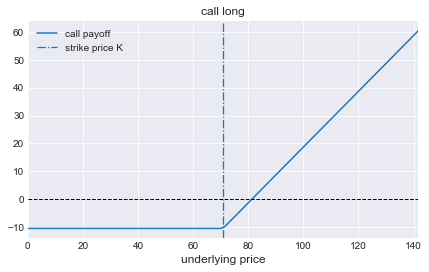

In [133]:
option_plot(call_long_at_maturity, option_type="call", position="long")

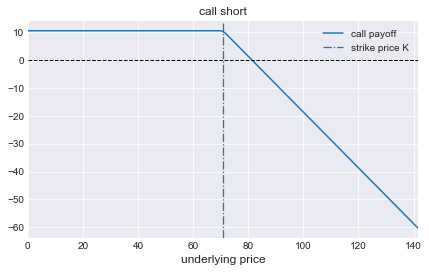

In [135]:
option_plot(call_short_at_maturity, option_type="call", position="short")

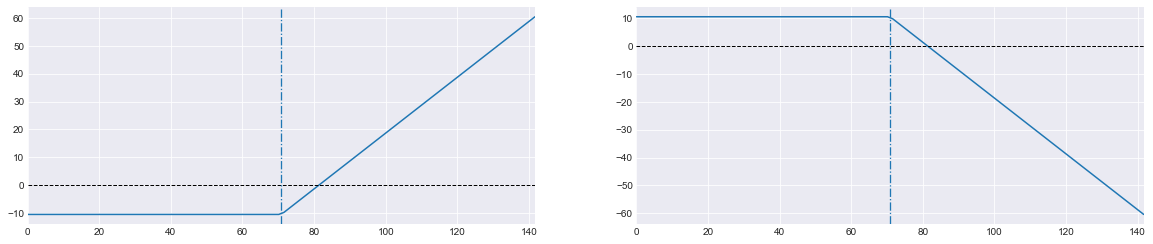

In [83]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

call_long_at_maturity.plot(ax=ax[0], grid=True) #, figsize=(10,6))
ax[0].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k")
ax[0].axvline(x=K, linestyle="-.", linewidth=1.3)

call_short_at_maturity.plot(ax=ax[1], grid=True) #, figsize=(10,6))
ax[1].axhline(y=0.0, linestyle="--", linewidth=1.0, color="k")
ax[1].axvline(x=K, linestyle="-.", linewidth=1.3)


plt.show()

In [60]:
underlying_prices = np.linspace(0,2*K,100)

strike_prices = np.repeat(K,underlying_prices.shape[0]) 

call_premiums = np.repeat(call_premium,underlying_prices.shape[0])

zeros = np.repeat(0,underlying_prices.shape[0])

In [63]:
call_long_at_maturity = pd.Series(np.maximum(underlying_prices-strike_prices,zeros) - call_premiums, index=underlying_prices) ##.plot()
#call_long_at_maturity

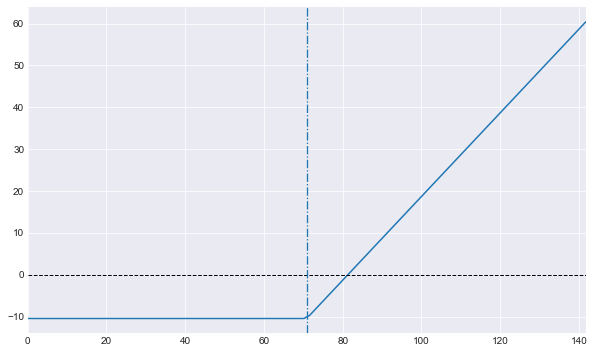

In [74]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
call_long_at_maturity.plot(ax=ax, grid=True, figsize=(10,6))
ax.axhline(y=0.0, linestyle="--", linewidth=1.0, color="k")
ax.axvline(x=K, linestyle="-.", linewidth=1.3)
plt.show()

In [39]:



value_at_maturity = pd.concat([underlying_prices-strike_prices, zeros], axis=1).max(axis=1) - call_premiums
value_at_maturity.name = "value"

call_long = pd.concat([underlying_prices, strike_prices, value_at_maturity], axis=1)
call_long.set_index("S")

TypeError: cannot concatenate object of type "<class 'numpy.ndarray'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [50]:
call_long

,S,K,value
0,0.000000,70.85,-10.450000
1,1.431313,70.85,-10.450000
2,2.862626,70.85,-10.450000
3,4.293939,70.85,-10.450000
4,5.725253,70.85,-10.450000
5,7.156566,70.85,-10.450000
6,8.587879,70.85,-10.450000
7,10.019192,70.85,-10.450000
8,11.450505,70.85,-10.450000
9,12.881818,70.85,-10.450000


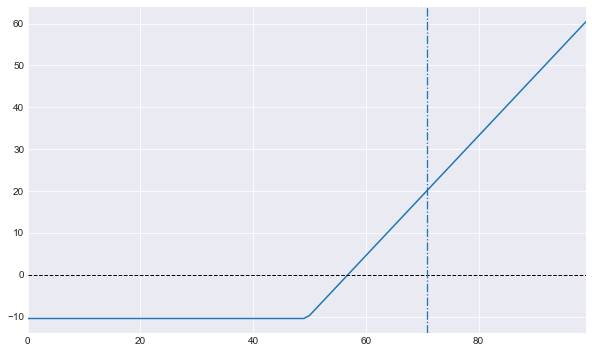

In [38]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
call_long["value"].plot(ax=ax, grid=True, figsize=(10,6))
ax.axhline(y=0.0, linestyle="--", linewidth=1.0, color="k")
ax.axvline(x=K, linestyle="-.", linewidth=1.3)
plt.show()

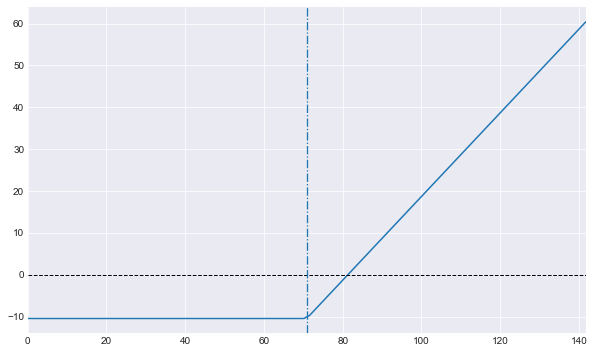

In [56]:
call_long = pd.Series( np.maximum( up - np.repeat(strike_price,len(up)), np.repeat(0,len(up)) ) - np.repeat(call_price, len(up)), 
                      index=up)


ValueError: invalid number of arguments